In [ ]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import os

url = "https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip"
output_dir = "NYC_POIs"

# 1. Download the file
resp = requests.get(url)
resp.raise_for_status()  # will raise an error if download failed

# 2. Unzip the content in memory
with zipfile.ZipFile(io.BytesIO(resp.content)) as z:
    # optionally, you can list files:
    # print(z.namelist())
    # extract all files to output_dir
    os.makedirs(output_dir, exist_ok=True)
    z.extractall(path=output_dir)

print("Downloaded and extracted to:", output_dir)


In [27]:
#if no header, had header=None to say that has no header and add manually trough names=...
d_types = {
    "@type":str,
    "@lat":float,
    "@lon":float,
    "amenity":str,
    "name":str,
    "shop":str,
    "public_transport":str,
    "highway":str, 
}
ny_data_pois = pd.read_csv("NYC_POIs/ny_municipality_pois_id.csv", header=None, names=['@id'])
ny_data = pd.read_csv("NYC_POIs/pois_all_info", sep='\t', dtype=d_types, index_col="@id")

#print(ny_data.head())

#print(ny_data_pois[:])

#filter just the pois
ny_data = ny_data[ny_data.index.isin(ny_data_pois['@id'])]

#print(ny_data.shape)
tot = len(ny_data.index)
#print(ny_data.columns)

#for each column in the loaded dataset count the number of missing values.
nulls_n =  ny_data.isnull().sum()
present_n = tot - ny_data.isnull().sum()


#print(nulls_n)
print("Number of missing values:\n")
print(present_n[['amenity', 'shop', 'public_transport', 'highway']])
print(tot - present_n[['amenity', 'shop', 'public_transport', 'highway']].sum())
    

Number of missing values:

amenity             24697
shop                 8717
public_transport     8375
highway              7559
dtype: int64
4173


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...
2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN
2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN
2553096143,node,40.736024,-73.713047,NaN,NaN,NaN,NaN,NaN


Now, analyze the distribution of the POI types for each POI category. Point of interest categories are
amenity, shop, public_transport and highway. For each of them, plot a histogram showing the
distribution of the types of POI. Note that, for certain categories, due to the high number of types,
bars and labels could not fit adequately in the figure. Hence, fix a threshold (a percentage one is
better) and plot only the most frequent types.
To simplify the subsequent analysis, use the retained top frequent POI types also for the following
exercises.

[6052 4156 1531 1374 1093 1064 1012  912  862  821]


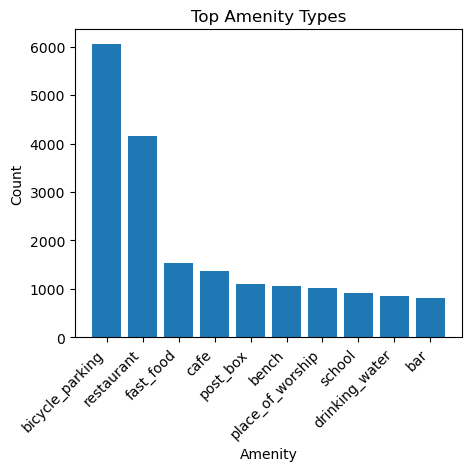

In [133]:
import matplotlib.pyplot as plt

cols = ['amenity', 'shop', 'public_transport', 'highway']
max_cat = 10

# filter non-null values per column
ny_data = ny_data[ny_data.notnull()]

#ny_data = ny_data.dropna()
#print(ny_data)

mask = (ny_data['@type'] == 'node')

distr = {}
vc = {}
for col in cols:
    distr[col] = ny_data.loc[mask, col]
    #print(col + "\n")
    vc[col] = distr[col].value_counts().head(max_cat)
    
    #print(distr[col].value_counts().head(20))# Show the most frequent amenity types (top 20 by count)
    #print(distr[col].value_counts())# Show the most frequent amenity types (top 20 by count)

#top_name = vc['amenity'].index[0]    # 'bicycle_parking'
#top_value = vc['amenity'].iloc[0]   # 6052


print(vc['amenity'].values)

x = [1,] # position of the bars, x axis
labels = [vc['amenity'].index]
fig, ax = plt.subplots(figsize=(5, 4))
amenity_series = vc['amenity']

# Bar chart
ax.bar(amenity_series.index, amenity_series.values)

# Make it readable
ax.set_xlabel('Amenity')
ax.set_ylabel('Count')
ax.set_title('Top Amenity Types')
plt.xticks(rotation=45, ha='right')
plt.show()





